In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("medium_data.csv")
df.head()

,id,url,title,subtitle,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/not-all-rainbow...,Not All Rainbows and Sunshine: The Darker Side...,Part 1: The Risks and Ethical Issues…,453.0,11,9,Towards Data Science,27-01-2023
1,2,https://towardsdatascience.com/ethics-in-ai-po...,Ethics in AI: Potential Root Causes for Biased...,An alternative approach to understanding bias ...,311.0,3,12,Towards Data Science,27-01-2023
2,3,https://towardsdatascience.com/python-tuple-th...,"Python Tuple, The Whole Truth and Only the Tru...",NaN,188.0,0,24,Towards Data Science,27-01-2023
3,4,https://towardsdatascience.com/dates-and-subqu...,Dates and Subqueries in SQL,Working with dates in SQL,15.0,1,4,Towards Data Science,27-01-2023
4,5,https://towardsdatascience.com/temporal-differ...,Temporal Differences with Python: First Sample...,NaN,10.0,0,13,Towards Data Science,27-01-2023


In [3]:
df.describe()

,id,claps,responses,reading_time
count,2498.000000,2423.000000,2498.000000,2498.000000
mean,1249.500000,367.353281,5.544035,7.479984
std,721.254809,678.886988,12.793039,3.699977
min,1.000000,0.000000,0.000000,1.000000
25%,625.250000,62.000000,0.000000,5.000000
50%,1249.500000,155.000000,2.000000,7.000000
75%,1873.750000,381.500000,5.000000,9.000000
max,2498.000000,11100.000000,207.000000,43.000000


In [4]:
df['length'] = df['title'].str.len()
df.describe()

,id,claps,responses,reading_time,length
count,2498.000000,2423.000000,2498.000000,2498.000000,2498.000000
mean,1249.500000,367.353281,5.544035,7.479984,58.417134
std,721.254809,678.886988,12.793039,3.699977,23.946504
min,1.000000,0.000000,0.000000,1.000000,4.000000
25%,625.250000,62.000000,0.000000,5.000000,43.000000
50%,1249.500000,155.000000,2.000000,7.000000,56.000000
75%,1873.750000,381.500000,5.000000,9.000000,68.000000
max,2498.000000,11100.000000,207.000000,43.000000,274.000000


In [5]:
df.describe(include = 'O')

,url,title,subtitle,publication,date
count,2498,2498,2073,2498,2498
unique,1849,1848,1518,4,70
top,https://towardsdatascience.com/not-all-rainbow...,Ludic audio and player performance,Weekly curated resources for…,Towards Data Science,04-01-2023
freq,2,3,7,1228,80


## Checking for missing data

In [6]:
df.isna().sum()

id                0
url               0
title             0
subtitle        425
claps            75
responses         0
reading_time      0
publication       0
date              0
length            0
dtype: int64

In [8]:
df['subtitle'].fillna('unknown', inplace=True)
df['claps'].fillna('unknown', inplace=True)
df.isna().sum()

id              0
url             0
title           0
subtitle        0
claps           0
responses       0
reading_time    0
publication     0
date            0
length          0
dtype: int64

## Plotting data

<Axes: >

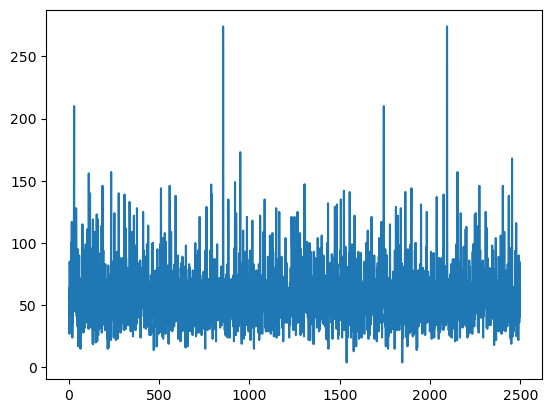

In [9]:
df['length'].plot()

<Axes: >

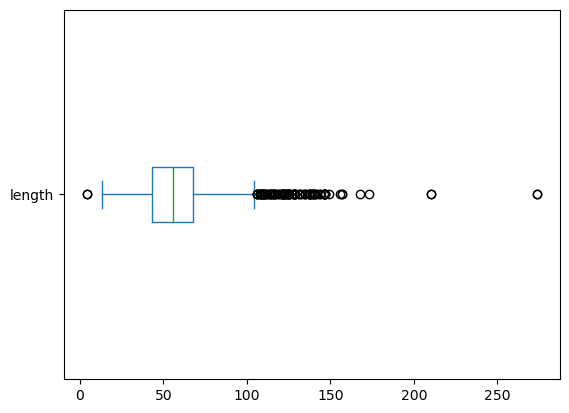

In [10]:
df['length'].plot(kind = 'box', vert = False)

<Axes: ylabel='Frequency'>

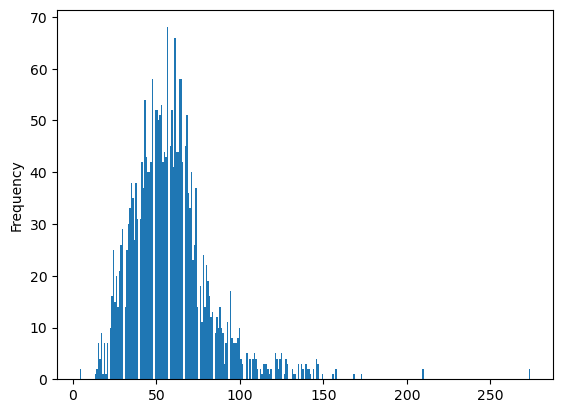

In [11]:
df['length'].plot(kind = 'hist', bins = 300)

## Regex

In [15]:
import regex as re
import nltk

In [16]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
stopwords = set(nltk.corpus.stopwords.words('english'))

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)

In [17]:
df['num_tokens'] = df['tokens'].map(len)
df.tail()

,id,url,title,subtitle,claps,responses,reading_time,publication,date,length,tokens,num_tokens
2493,2494,https://medium.com/swlh/brian-chesky-is-an-exa...,Brian Chesky is an Example of What it Means to...,unknown,370.0,2,7,The Startup,29-01-2023,65,"[brian, chesky, example, means, entrepreneur]",5
2494,2495,https://medium.com/swlh/5-red-flags-of-online-...,5 Red Flags of Online Business Gurus,How to know which mentors you can’t trust onli...,250.0,6,8,The Startup,29-01-2023,36,"[red, flags, online, business, gurus]",5
2495,2496,https://writingcooperative.com/recognizing-the...,Recognizing These Three Realities Can Help Set...,unknown,410.0,10,4,The Writing Cooperative,29-01-2023,85,"[recognizing, three, realities, help, set, suc...",8
2496,2497,https://writingcooperative.com/i-remember-it-l...,“I Remember It Like It Was Just Yesterday…” Re...,The Role of Emotional Memory in Our Writing,461.0,7,7,The Writing Cooperative,29-01-2023,51,"[remember, like, yesterday, really]",4
2497,2498,https://writingcooperative.com/how-to-formulat...,How to Formulate a Great Nonfiction Theme,There’s (almost) no such thing as too much tim...,158.0,2,5,The Writing Cooperative,29-01-2023,41,"[formulate, great, nonfiction, theme]",4


## Word frequency

In [19]:
from collections import Counter

In [20]:
counter = Counter()
df['tokens'].map(counter.update)
print(counter.most_common(5))

[('strong', 277), ('data', 243), ('learning', 160), ('writing', 159), ('python', 149)]


In [21]:
freq_df = pd.DataFrame.from_dict(counter,orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
strong,277
data,243
learning,160
writing,159
python,149
class,147
markup--strong,138
markup--h3-strong,138
using,137


In [22]:
freq_df.describe()

,freq
count,3626.000000
mean,4.073911
std,11.125493
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,277.000000


[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

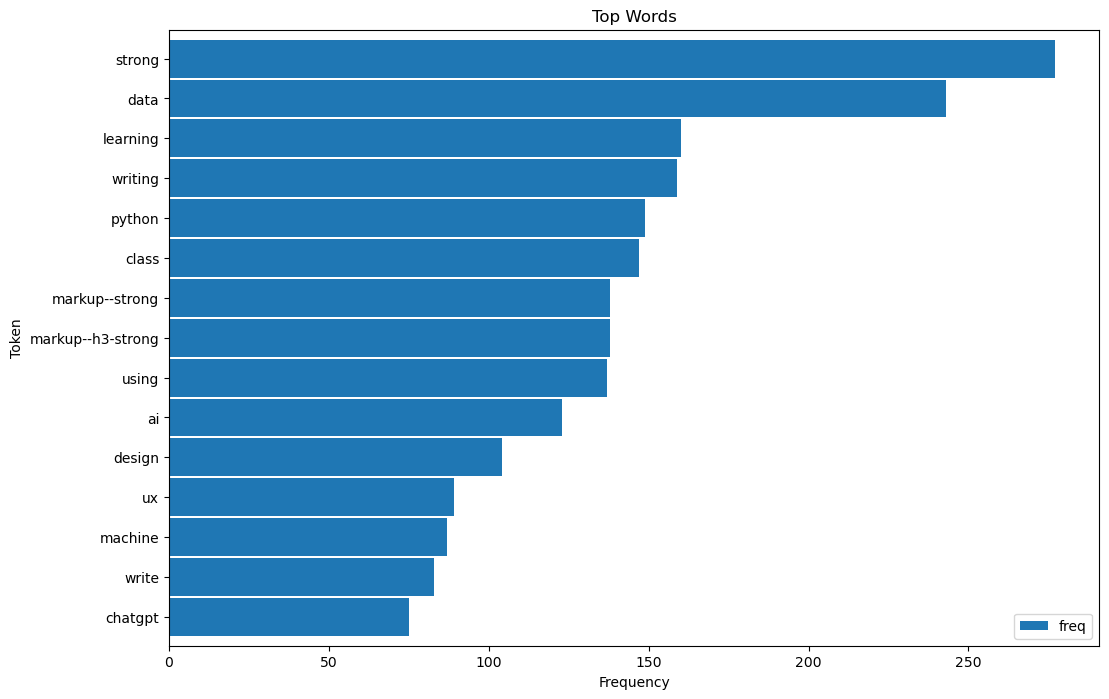

In [23]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

## Wordcloud

In [25]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

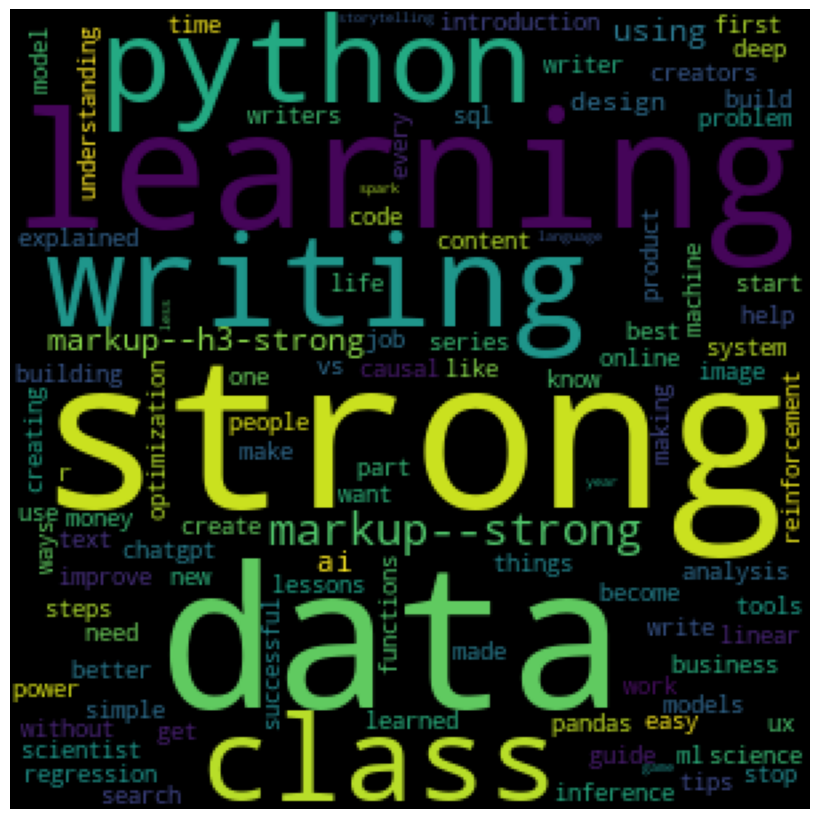

In [26]:
wc = WordCloud(background_color='black', width = 300, height=300,max_words=100, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()